In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

C:\Users\MASANAMUTHU\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
mnist=tf.keras.datasets.mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


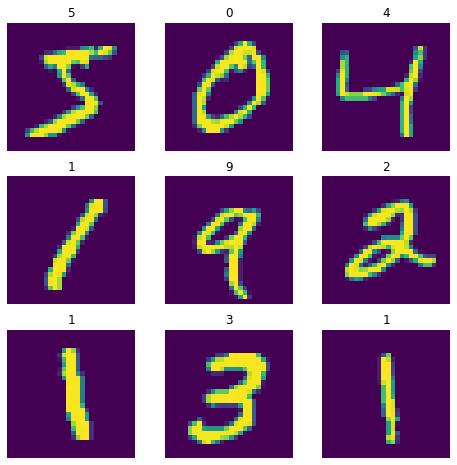

In [5]:
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    plt.title(y_train[i])
    plt.axis('off')

In [6]:
x_train=tf.keras.utils.normalize(x_train,axis=0)
x_test=tf.keras.utils.normalize(x_test,axis=0)

In [7]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 111146 (434.16 KB)
Trainable params: 111146 (434.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['Accuracy'])

In [10]:
model.fit(x_train,y_train,
          validation_data=(x_test,y_test),
          batch_size=32,
          epochs=15)

Epoch 1/15


1875/1875 [==============================] - 10s 5ms/step - loss: 0.5845 - Accuracy: 0.8219 - val_loss: 0.4623 - val_Accuracy: 0.8928
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2623 - Accuracy: 0.9220 - val_loss: 0.3174 - val_Accuracy: 0.9257
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1928 - Accuracy: 0.9427 - val_loss: 0.2852 - val_Accuracy: 0.9372
Epoch 4/15
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1500 - Accuracy: 0.9544 - val_loss: 0.2033 - val_Accuracy: 0.9569
Epoch 5/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1226 - Accuracy: 0.9627 - val_loss: 0.2236 - val_Accuracy: 0.9532
Epoch 6/15
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1025 - Accuracy: 0.9691 - val_loss: 0.2076 - val_Accuracy: 0.9569
Epoch 7/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0867 - Accuracy: 0.9740 - val_loss: 0.1752 - val_A

1/1 [==============================] - 0s 31ms/step
4


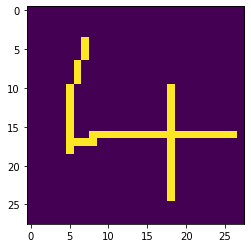

In [15]:
import cv2
image=cv2.imread('Downloads/ML/level1/4.png')[:,:,0]
image=np.invert(np.array([image]))

output= model.predict(image)
plt.imshow(image[0])
print(np.argmax(output))